In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
from mpl_toolkits.mplot3d import Axes3D

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

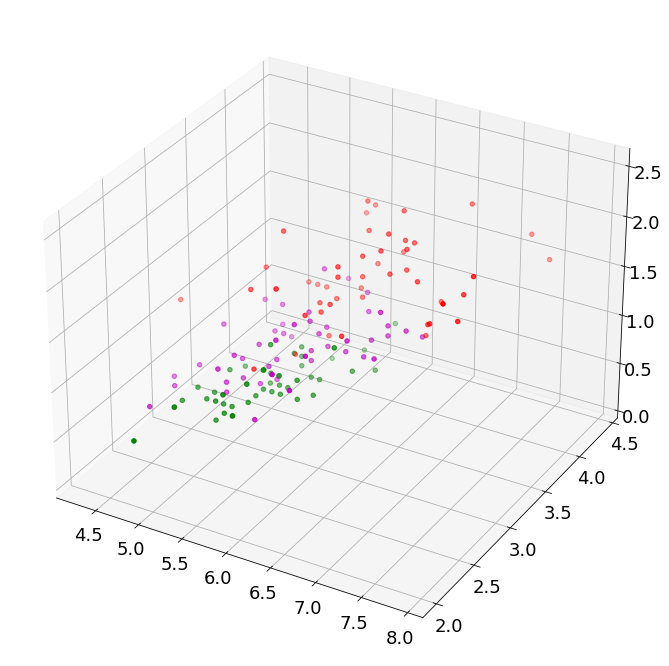

In [2]:
# Figure 5.1
# Import data
fisheriris_mat = io.loadmat('fisheriris.mat')
meas = fisheriris_mat['meas']

x1 = meas[:50,:] # setosa
x2 = meas[50:100,:] # versicolor
x3 = meas[100:,:] # virginica

# Plot data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1[:,0], x1[:,1], x1[:,3], c='g', marker='o')
ax.scatter(x2[:,0], x2[:,1], x2[:,3], c='m', marker='o')
ax.scatter(x3[:,0], x3[:,1], x3[:,3], c='r', marker='o')

plt.show()

In [3]:
# Import data
dogdata_mat = io.loadmat('dogData.mat')
catdata_mat = io.loadmat('catData.mat')

dogdata_w_mat = io.loadmat('dogData_w.mat')
catdata_w_mat = io.loadmat('catData_w.mat')

dog = dogdata_mat['dog']
cat = catdata_mat['cat']

dog_wave = dogdata_w_mat['dog_wave']
cat_wave = catdata_w_mat['cat_wave']

# Combine datasets
CD = np.concatenate((dog,cat),axis=1)
CD2 = np.concatenate((dog_wave,cat_wave),axis=1)

u,s,vh = np.linalg.svd(CD-np.mean(CD),full_matrices=0)
u2,s2,vh2 = np.linalg.svd(CD2-np.mean(CD2),full_matrices=0)

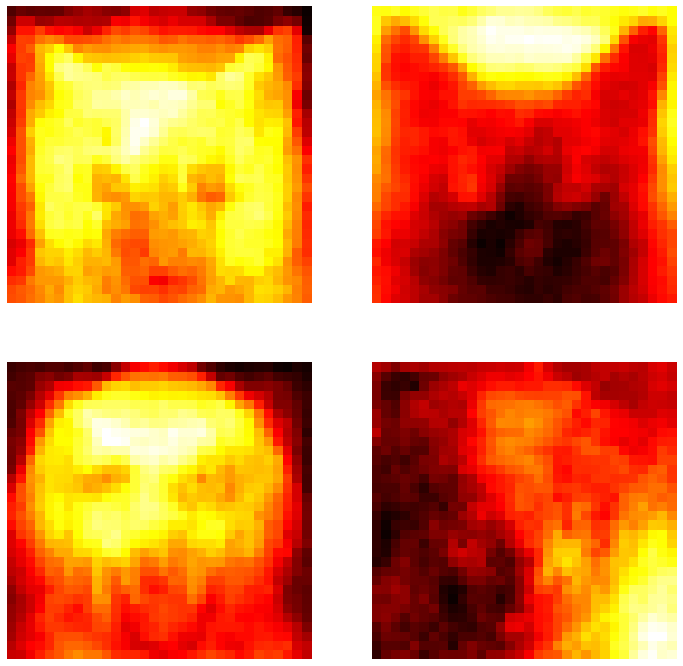

In [4]:
# Figure 5.3
# Plot SVD features
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)
for j in range(4):
    U = np.flipud(np.reshape(u[:,j],(64,64)))
    U2 = U[::2,::2] # Reduce resolution
    axs[j].pcolor(np.rot90(U2),cmap='hot')
    axs[j].axis('off')

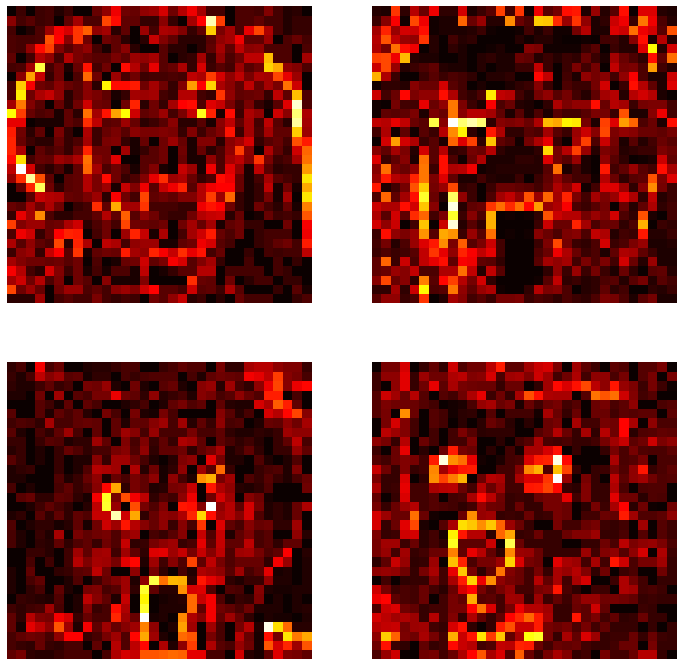

In [5]:
# Plot dogs in wavelet domain
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)
for j in range(4):
    Xd = np.flipud(np.reshape(dog_wave[:,j],(32,32)))
    axs[j].pcolor(np.rot90(Xd),cmap='hot')
    axs[j].axis('off')

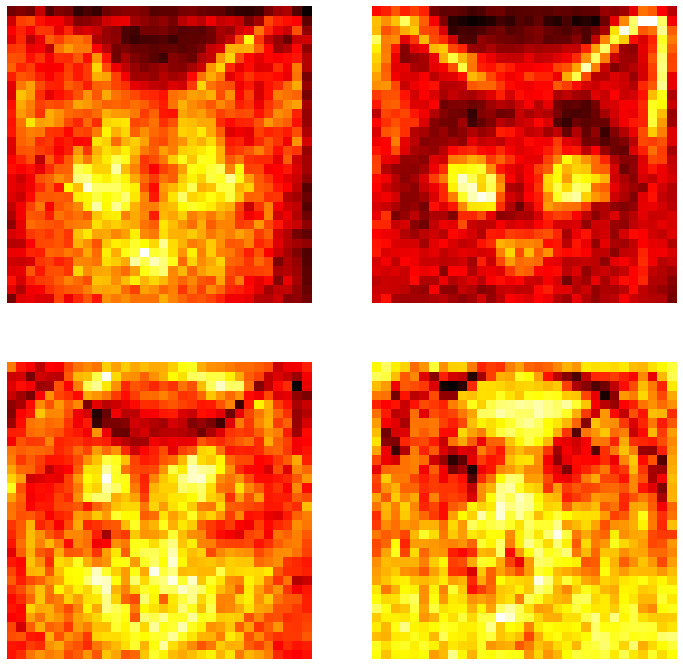

In [6]:
# Figure 5.4
# Plot SVD features in wavelet domain
fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)
for j in range(4):
    U3 = np.flipud(np.reshape(u2[:,j],(32,32)))
    axs[j].pcolor(np.rot90(U3),cmap='hot')
    axs[j].axis('off')

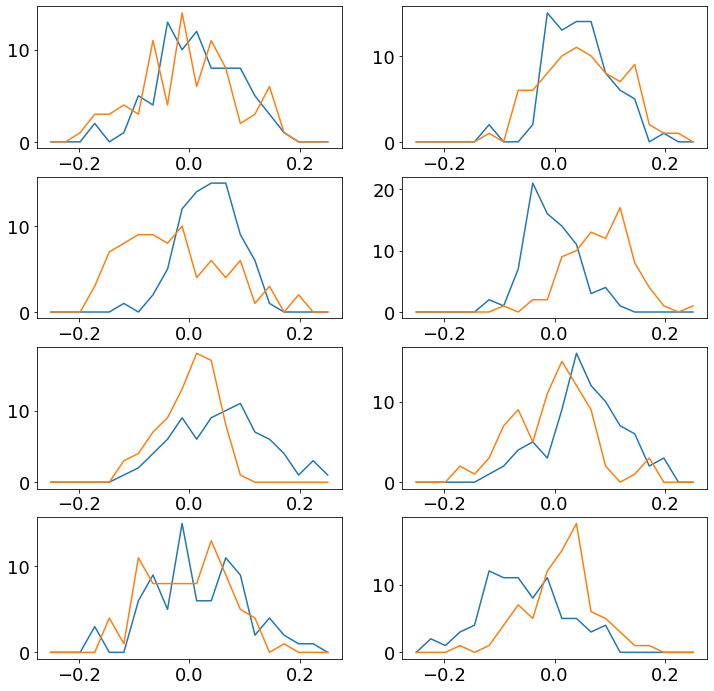

In [7]:
# Figure 5.5
xbin = np.linspace(-0.25,0.25,20)
xbin_edges = np.append(xbin,xbin[-1]+(xbin[1]-xbin[0])) - (xbin[1]-xbin[0])/2
fig,axs = plt.subplots(4,2)
for j in range(4):
    pdf1 = np.histogram(vh[j,:80],bins=xbin_edges)[0]
    pdf2 = np.histogram(vh[j,80:],bins=xbin_edges)[0]
    axs[j,0].plot(xbin,pdf1)
    axs[j,0].plot(xbin,pdf2)
    
    pdf1 = np.histogram(vh2[j,:80],bins=xbin_edges)[0]
    pdf2 = np.histogram(vh2[j,80:],bins=xbin_edges)[0]
    axs[j,1].plot(xbin,pdf1)
    axs[j,1].plot(xbin,pdf2)